In [94]:
import pandas as pd
import os

# Define dataset directory
dataset_dir = "datasets"

# Load feature set DataFrames
df_feature_sets = {
    key: pd.read_csv(os.path.join(dataset_dir, f"{key}.csv")) for key in ["repo_meta", "repo_activity", "dependency_only", "all_but_text", "full_features"]
}

# Display dataset shapes
for key, df in df_feature_sets.items():
    print(f"{key}: {df.shape}")


repo_meta: (255, 8)
repo_activity: (255, 9)
dependency_only: (255, 770)
all_but_text: (255, 818)
full_features: (255, 1142)


In [95]:
from sklearn.model_selection import train_test_split

# Define train-test split ratio
test_size = 0.2
random_state = 42  # Ensures reproducibility

# Dictionary to store train-test splits
train_test_splits = {}

# Split each dataset
for key, df in df_feature_sets.items():
    X = df.drop(columns=["vp-category-equalfreq"])  # Features
    y = df["vp-category-equalfreq"]  # Target variable
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    
    train_test_splits[key] = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
    print(f"{key}: Train {X_train.shape}, Test {X_test.shape}")


repo_meta: Train (204, 7), Test (51, 7)
repo_activity: Train (204, 8), Test (51, 8)
dependency_only: Train (204, 769), Test (51, 769)
all_but_text: Train (204, 817), Test (51, 817)
full_features: Train (204, 1141), Test (51, 1141)


# Traditional Machine Learning Models (Excluding Neural Networks)
ml_models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "SVM": SVC(probability=True, kernel="rbf", random_state=42),
    "NaiveBayes": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
}

print(f"Initialized {len(ml_models)} machine learning models (excluding neural networks).")


In [96]:
# Traditional Machine Learning Models (Excluding Neural Networks)
ml_models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),  # Fixed XGBoost warning
    "SVM": SVC(probability=True, kernel="rbf", random_state=42),
    "NaiveBayes": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
}

print(f"Initialized {len(ml_models)} machine learning models (excluding neural networks).")


Initialized 5 machine learning models (excluding neural networks).


In [97]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Dictionary to store results
cv_results = {}

# Train each model using cross-validation
for model_name, model in ml_models.items():
    print(f"Training {model_name}...")
    
    # Initialize list to store scores
    model_scores = {"F1-score": [], "Accuracy": [], "ROC-AUC": []}
    
    for key, dataset in train_test_splits.items():
        X, y = dataset["X_train"], dataset["y_train"]
        
        # Perform cross-validation and collect scores
        f1 = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1").mean()
        accuracy = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy").mean()
        roc_auc = cross_val_score(model, X, y, cv=cv_strategy, scoring="roc_auc").mean()

        model_scores["F1-score"].append(f1)
        model_scores["Accuracy"].append(accuracy)
        model_scores["ROC-AUC"].append(roc_auc)
    
    # Compute mean and standard deviation of scores
    cv_results[model_name] = {
        "F1-score": (np.mean(model_scores["F1-score"]), np.std(model_scores["F1-score"])),
        "Accuracy": (np.mean(model_scores["Accuracy"]), np.std(model_scores["Accuracy"])),
        "ROC-AUC": (np.mean(model_scores["ROC-AUC"]), np.std(model_scores["ROC-AUC"])),
    }

print("Cross-validation completed!")


Training RandomForest...
Training XGBoost...
Training SVM...
Training NaiveBayes...
Training LogisticRegression...


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

Cross-validation completed!


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

In [98]:
import pandas as pd

# Convert results dictionary into a DataFrame
cv_results_df = pd.DataFrame.from_dict(cv_results, orient="index")

# Display results
print(cv_results_df)

# Save results to CSV
output_path = "datasets/cv_results.csv"
cv_results_df.to_csv(output_path)
print(f"Cross-validation results saved to: {output_path}")


                                                      F1-score  \
RandomForest         (0.6656191203104538, 0.15613034857392663)   
XGBoost              (0.7048782082014856, 0.24348643635668007)   
SVM                 (0.38735428717854914, 0.08076644371563531)   
NaiveBayes           (0.4105758502401743, 0.11866787011620979)   
LogisticRegression   (0.5859301216288206, 0.05416486092366573)   

                                                      Accuracy  \
RandomForest         (0.7110243902439025, 0.13231979540866098)   
XGBoost              (0.7384146341463415, 0.21565577259746688)   
SVM                 (0.5825609756097562, 0.028826544380416482)   
NaiveBayes           (0.5796829268292683, 0.03531734267516088)   
LogisticRegression   (0.6267560975609756, 0.03484209301359652)   

                                                       ROC-AUC  
RandomForest         (0.7439229892914103, 0.18160398715335677)  
XGBoost               (0.7424269765322397, 0.2160598038135493)  
SVM        

In [99]:
from sklearn.preprocessing import StandardScaler

# Identify numeric columns (exclude categorical or text-based features)
numeric_features = df_feature_sets["full_features"].drop(columns=["vp-category-equalfreq"]).select_dtypes(include=["int64", "float64"]).columns

# Apply StandardScaler
scaler = StandardScaler()
df_feature_sets["full_features"][numeric_features] = scaler.fit_transform(df_feature_sets["full_features"][numeric_features])

print("Feature scaling applied to numerical features.")


Feature scaling applied to numerical features.


In [100]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter grids
param_grids = {
    "RandomForest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 6, 10],
        "n_estimators": [100, 200, 300]
    },
    "SVM": {
        "C": [0.1, 1, 10, 100],
        "gamma": ["scale", "auto"],
        "kernel": ["linear", "rbf"]
    },
    "LogisticRegression": {
        "C": np.logspace(-3, 3, 7),
        "solver": ["liblinear", "lbfgs"]
    }
}

# Dictionary to store best models
best_models = {}

# Perform hyperparameter tuning
for model_name, model in ml_models.items():
    if model_name in param_grids:
        print(f"Tuning {model_name}...")
        random_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=10, cv=5, scoring="f1", n_jobs=-1, random_state=42)
        
        # Fit the search to the full dataset
        X_full, y_full = df_feature_sets["full_features"].drop(columns=["vp-category-equalfreq"]), df_feature_sets["full_features"]["vp-category-equalfreq"]
        random_search.fit(X_full, y_full)
        
        # Store best model
        best_models[model_name] = random_search.best_estimator_
        print(f"Best params for {model_name}: {random_search.best_params_}")
    else:
        # No tuning needed for Naïve Bayes
        best_models[model_name] = model

print("Hyperparameter tuning completed!")


Tuning RandomForest...


Best params for RandomForest: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 20}
Tuning XGBoost...
Best params for XGBoost: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01}
Tuning SVM...
Best params for SVM: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Tuning LogisticRegression...
Best params for LogisticRegression: {'solver': 'liblinear', 'C': np.float64(0.1)}
Hyperparameter tuning completed!


In [101]:
import joblib
import os

# Define output directory for final models
model_output_dir = "datasets/models2"
os.makedirs(model_output_dir, exist_ok=True)

# Train and save each model with best hyperparameters
for model_name, model in best_models.items():
    print(f"Training final model: {model_name}...")
    
    # Train model on full dataset
    X_full, y_full = df_feature_sets["full_features"].drop(columns=["vp-category-equalfreq"]), df_feature_sets["full_features"]["vp-category-equalfreq"]
    model.fit(X_full, y_full)
    
    # Save trained model
    model_path = os.path.join(model_output_dir, f"{model_name}.joblib")
    joblib.dump(model, model_path)
    print(f"Saved: {model_path}")

print("All final models trained and saved successfully!")


Training final model: RandomForest...
Saved: datasets/models2/RandomForest.joblib
Training final model: XGBoost...
Saved: datasets/models2/XGBoost.joblib
Training final model: SVM...
Saved: datasets/models2/SVM.joblib
Training final model: NaiveBayes...
Saved: datasets/models2/NaiveBayes.joblib
Training final model: LogisticRegression...
Saved: datasets/models2/LogisticRegression.joblib
All final models trained and saved successfully!


In [102]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Dictionary to store final evaluation results
final_cv_results = {}

# Perform cross-validation again with optimized models
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    
    # Initialize dictionary for storing scores
    model_scores = {"F1-score": [], "Accuracy": [], "ROC-AUC": []}
    
    for key, dataset in train_test_splits.items():
        X, y = dataset["X_train"], dataset["y_train"]
        
        # Perform cross-validation
        f1 = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1").mean()
        accuracy = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy").mean()
        roc_auc = cross_val_score(model, X, y, cv=cv_strategy, scoring="roc_auc").mean()

        model_scores["F1-score"].append(f1)
        model_scores["Accuracy"].append(accuracy)
        model_scores["ROC-AUC"].append(roc_auc)
    
    # Store mean and std of scores
    final_cv_results[model_name] = {
        "F1-score": (np.mean(model_scores["F1-score"]), np.std(model_scores["F1-score"])),
        "Accuracy": (np.mean(model_scores["Accuracy"]), np.std(model_scores["Accuracy"])),
        "ROC-AUC": (np.mean(model_scores["ROC-AUC"]), np.std(model_scores["ROC-AUC"])),
    }

print("Final model evaluation completed!")

# Convert to DataFrame
final_cv_results_df = pd.DataFrame.from_dict(final_cv_results, orient="index")

# Display results
print(final_cv_results_df)

# Save results
final_results_path = "datasets/final_cv_results.csv"
final_cv_results_df.to_csv(final_results_path)
print(f"Final cross-validation results saved to: {final_results_path}")


Evaluating RandomForest...
Evaluating XGBoost...
Evaluating SVM...
Evaluating NaiveBayes...
Evaluating LogisticRegression...
Final model evaluation completed!
                                                     F1-score  \
RandomForest          (0.6908498463266534, 0.166898481834199)   
XGBoost             (0.7064005286917769, 0.24585389751273137)   
SVM                    (0.11621950315165, 0.2130031253271499)   
NaiveBayes          (0.4105758502401743, 0.11866787011620979)   
LogisticRegression  (0.5971435703288831, 0.04925438693839999)   

                                                      Accuracy  \
RandomForest         (0.7246341463414634, 0.14878724494851506)   
XGBoost              (0.7422682926829268, 0.21547592138061392)   
SVM                 (0.5470243902439024, 0.035803980848731036)   
NaiveBayes           (0.5796829268292683, 0.03531734267516088)   
LogisticRegression   (0.5569756097560976, 0.07523504315951948)   

                                                     

In [103]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Dictionary to store the final evaluation results with additional metrics
final_cv_results = {}

# Perform cross-validation again with optimized models
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    
    # Initialize dictionary for storing scores
    model_scores = {"F1-score": [], "Accuracy": [], "ROC-AUC": [], "Precision": [], "Recall": []}
    
    for key, dataset in train_test_splits.items():
        X, y = dataset["X_train"], dataset["y_train"]
        
        # Perform cross-validation for all metrics
        f1 = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1").mean()
        accuracy = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy").mean()
        roc_auc = cross_val_score(model, X, y, cv=cv_strategy, scoring="roc_auc").mean()
        precision = cross_val_score(model, X, y, cv=cv_strategy, scoring="precision").mean()
        recall = cross_val_score(model, X, y, cv=cv_strategy, scoring="recall").mean()

        model_scores["F1-score"].append(f1)
        model_scores["Accuracy"].append(accuracy)
        model_scores["ROC-AUC"].append(roc_auc)
        model_scores["Precision"].append(precision)
        model_scores["Recall"].append(recall)
    
    # Store mean and std of scores
    final_cv_results[model_name] = {
        "F1-score": (np.mean(model_scores["F1-score"]), np.std(model_scores["F1-score"])),
        "Accuracy": (np.mean(model_scores["Accuracy"]), np.std(model_scores["Accuracy"])),
        "ROC-AUC": (np.mean(model_scores["ROC-AUC"]), np.std(model_scores["ROC-AUC"])),
        "Precision": (np.mean(model_scores["Precision"]), np.std(model_scores["Precision"])),
        "Recall": (np.mean(model_scores["Recall"]), np.std(model_scores["Recall"])),
    }

print("Final model evaluation with Precision and Recall completed!")

# Convert to DataFrame
final_cv_results_df = pd.DataFrame.from_dict(final_cv_results, orient="index")

# Save updated results
final_results_path = "datasets/final_cv_results_with_precision_recall.csv"
final_cv_results_df.to_csv(final_results_path)
print(f"Final cross-validation results saved to: {final_results_path}")

# Display the updated results
print(final_cv_results_df)


Evaluating RandomForest...
Evaluating XGBoost...
Evaluating SVM...


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0

Evaluating NaiveBayes...
Evaluating LogisticRegression...
Final model evaluation with Precision and Recall completed!
Final cross-validation results saved to: datasets/final_cv_results_with_precision_recall.csv
                                                     F1-score  \
RandomForest          (0.6908498463266534, 0.166898481834199)   
XGBoost             (0.7064005286917769, 0.24585389751273137)   
SVM                    (0.11621950315165, 0.2130031253271499)   
NaiveBayes          (0.4105758502401743, 0.11866787011620979)   
LogisticRegression  (0.5971435703288831, 0.04925438693839999)   

                                                      Accuracy  \
RandomForest         (0.7246341463414634, 0.14878724494851506)   
XGBoost              (0.7422682926829268, 0.21547592138061392)   
SVM                 (0.5470243902439024, 0.035803980848731036)   
NaiveBayes           (0.5796829268292683, 0.03531734267516088)   
LogisticRegression   (0.5569756097560976, 0.07523504315951948)   

 

In [104]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# Dictionary to store evaluation results for all feature sets
final_cv_results = []

# Perform cross-validation for each model on each feature set
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    
    for feature_set_name, dataset in train_test_splits.items():
        X, y = dataset["X_train"], dataset["y_train"]
        
        # Compute cross-validation scores for all metrics
        f1 = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1").mean()
        accuracy = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy").mean()
        roc_auc = cross_val_score(model, X, y, cv=cv_strategy, scoring="roc_auc").mean()
        precision = cross_val_score(model, X, y, cv=cv_strategy, scoring="precision").mean()
        recall = cross_val_score(model, X, y, cv=cv_strategy, scoring="recall").mean()

        # Store results
        final_cv_results.append({
            "Model": model_name,
            "Feature Set": feature_set_name,
            "F1-score": f"{f1:.3f}",
            "Accuracy": f"{accuracy:.3f}",
            "ROC-AUC": f"{roc_auc:.3f}",
            "Precision": f"{precision:.3f}",
            "Recall": f"{recall:.3f}",
        })

print("Final model evaluation with all metrics completed!")

# Convert results to DataFrame
final_cv_results_df = pd.DataFrame(final_cv_results)

# Save results to CSV
final_results_path = "datasets/final_cv_results_all_metrics.csv"
final_cv_results_df.to_csv(final_results_path, index=False)
print(f"Final cross-validation results saved to: {final_results_path}")

# Display results
print(final_cv_results_df)


Evaluating RandomForest...
Evaluating XGBoost...
Evaluating SVM...


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0

Evaluating NaiveBayes...
Evaluating LogisticRegression...
Final model evaluation with all metrics completed!
Final cross-validation results saved to: datasets/final_cv_results_all_metrics.csv
                 Model      Feature Set F1-score Accuracy ROC-AUC Precision  \
0         RandomForest        repo_meta    0.566    0.593   0.569     0.563   
1         RandomForest    repo_activity    0.524    0.579   0.576     0.553   
2         RandomForest  dependency_only    0.578    0.642   0.685     0.659   
3         RandomForest     all_but_text    0.915    0.922   0.980     0.937   
4         RandomForest    full_features    0.872    0.887   0.964     0.930   
5              XGBoost        repo_meta    0.500    0.549   0.534     0.516   
6              XGBoost    repo_activity    0.430    0.510   0.527     0.466   
7              XGBoost  dependency_only    0.602    0.652   0.683     0.652   
8              XGBoost     all_but_text    1.000    1.000   1.000     1.000   
9              XGB

In [105]:
final_cv_results_df

,Model,Feature Set,F1-score,Accuracy,ROC-AUC,Precision,Recall
0,RandomForest,repo_meta,0.566,0.593,0.569,0.563,0.571
1,RandomForest,repo_activity,0.524,0.579,0.576,0.553,0.500
2,RandomForest,dependency_only,0.578,0.642,0.685,0.659,0.521
3,RandomForest,all_but_text,0.915,0.922,0.980,0.937,0.896
4,RandomForest,full_features,0.872,0.887,0.964,0.930,0.824
5,XGBoost,repo_meta,0.500,0.549,0.534,0.516,0.487
6,XGBoost,repo_activity,0.430,0.510,0.527,0.466,0.406
7,XGBoost,dependency_only,0.602,0.652,0.683,0.652,0.563
8,XGBoost,all_but_text,1.000,1.000,1.000,1.000,1.000
9,XGBoost,full_features,1.000,1.000,1.000,1.000,1.000


In [106]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define improved hyperparameters to reduce overfitting
improved_models = {
    "RandomForest": RandomForestClassifier(n_estimators=50, max_depth=6, min_samples_split=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, reg_lambda=1, reg_alpha=1, random_state=42),
    "SVM": SVC(probability=True, kernel="rbf", C=1.0, class_weight="balanced", random_state=42),
    "NaiveBayes": GaussianNB(),  # No hyperparameters to tune
    "LogisticRegression": LogisticRegression(max_iter=500, C=1.0, class_weight="balanced", solver="lbfgs", random_state=42),
}

print("Updated models with improved regularization and balancing.")


Updated models with improved regularization and balancing.


In [107]:
# Dictionary to store new evaluation results
updated_cv_results = []

# Perform cross-validation again
for model_name, model in improved_models.items():
    print(f"Evaluating {model_name} (After Fix)...")
    
    for feature_set_name, dataset in train_test_splits.items():
        X, y = dataset["X_train"], dataset["y_train"]
        
        # Compute new cross-validation scores
        f1 = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1").mean()
        accuracy = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy").mean()
        roc_auc = cross_val_score(model, X, y, cv=cv_strategy, scoring="roc_auc").mean()
        precision = cross_val_score(model, X, y, cv=cv_strategy, scoring="precision").mean()
        recall = cross_val_score(model, X, y, cv=cv_strategy, scoring="recall").mean()

        # Store updated results
        updated_cv_results.append({
            "Model": model_name,
            "Feature Set": feature_set_name,
            "F1-score": f"{f1:.3f}",
            "Accuracy": f"{accuracy:.3f}",
            "ROC-AUC": f"{roc_auc:.3f}",
            "Precision": f"{precision:.3f}",
            "Recall": f"{recall:.3f}",
        })

print("Updated model evaluation completed!")

# Convert results to DataFrame
updated_cv_results_df = pd.DataFrame(updated_cv_results)

# Save new results
updated_results_path = "datasets/updated_cv_results_all_metrics.csv"
updated_cv_results_df.to_csv(updated_results_path, index=False)
print(f"Updated cross-validation results saved to: {updated_results_path}")

# Display results
print(updated_cv_results_df)


Evaluating RandomForest (After Fix)...
Evaluating XGBoost (After Fix)...
Evaluating SVM (After Fix)...
Evaluating NaiveBayes (After Fix)...
Evaluating LogisticRegression (After Fix)...


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

Updated model evaluation completed!
Updated cross-validation results saved to: datasets/updated_cv_results_all_metrics.csv
                 Model      Feature Set F1-score Accuracy ROC-AUC Precision  \
0         RandomForest        repo_meta    0.554    0.589   0.572     0.571   
1         RandomForest    repo_activity    0.538    0.579   0.558     0.545   
2         RandomForest  dependency_only    0.569    0.632   0.705     0.639   
3         RandomForest     all_but_text    0.799    0.829   0.924     0.879   
4         RandomForest    full_features    0.819    0.849   0.923     0.905   
5              XGBoost        repo_meta    0.542    0.569   0.549     0.535   
6              XGBoost    repo_activity    0.489    0.550   0.536     0.509   
7              XGBoost  dependency_only    0.598    0.637   0.661     0.635   
8              XGBoost     all_but_text    1.000    1.000   1.000     1.000   
9              XGBoost    full_features    1.000    1.000   1.000     1.000   
10      

/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

In [111]:
updated_cv_results_df

,Model,Feature Set,F1-score,Accuracy,ROC-AUC,Precision,Recall
0,RandomForest,repo_meta,0.554,0.589,0.572,0.571,0.541
1,RandomForest,repo_activity,0.538,0.579,0.558,0.545,0.541
2,RandomForest,dependency_only,0.569,0.632,0.705,0.639,0.521
3,RandomForest,all_but_text,0.799,0.829,0.924,0.879,0.738
4,RandomForest,full_features,0.819,0.849,0.923,0.905,0.760
5,XGBoost,repo_meta,0.542,0.569,0.549,0.535,0.551
6,XGBoost,repo_activity,0.489,0.550,0.536,0.509,0.478
7,XGBoost,dependency_only,0.598,0.637,0.661,0.635,0.574
8,XGBoost,all_but_text,1.000,1.000,1.000,1.000,1.000
9,XGBoost,full_features,1.000,1.000,1.000,1.000,1.000


Tunning does not improved default setup. RandomForest still the best model

In [108]:
# Dictionary to store final evaluation results after fixes
final_cv_results_v2 = []

# Perform cross-validation again
for model_name, model in improved_models_v2.items():
    print(f"Evaluating {model_name} (Final Fix)...")
    
    for feature_set_name, dataset in train_test_splits.items():
        X, y = dataset["X_train"], dataset["y_train"]
        
        # Compute cross-validation scores
        f1 = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1").mean()
        accuracy = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy").mean()
        roc_auc = cross_val_score(model, X, y, cv=cv_strategy, scoring="roc_auc").mean()
        precision = cross_val_score(model, X, y, cv=cv_strategy, scoring="precision").mean()
        recall = cross_val_score(model, X, y, cv=cv_strategy, scoring="recall").mean()

        # Store results
        final_cv_results_v2.append({
            "Model": model_name,
            "Feature Set": feature_set_name,
            "F1-score": f"{f1:.3f}",
            "Accuracy": f"{accuracy:.3f}",
            "ROC-AUC": f"{roc_auc:.3f}",
            "Precision": f"{precision:.3f}",
            "Recall": f"{recall:.3f}",
        })

print("Final model evaluation completed!")

# Convert results to DataFrame
final_cv_results_v2_df = pd.DataFrame(final_cv_results_v2)

# Save new results
final_results_path_v2 = "datasets/final_cv_results_with_feature_selection.csv"
final_cv_results_v2_df.to_csv(final_results_path_v2, index=False)
print(f"Final cross-validation results saved to: {final_results_path_v2}")

# Display results
final_cv_results_v2_df

Evaluating RandomForest (Final Fix)...
Evaluating XGBoost (Final Fix)...
Evaluating SVM (Final Fix)...
Evaluating NaiveBayes (Final Fix)...
Evaluating LogisticRegression (Final Fix)...


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

Final model evaluation completed!
Final cross-validation results saved to: datasets/final_cv_results_with_feature_selection.csv


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

,Model,Feature Set,F1-score,Accuracy,ROC-AUC,Precision,Recall
0,RandomForest,repo_meta,0.544,0.618,0.565,0.620,0.488
1,RandomForest,repo_activity,0.530,0.584,0.590,0.554,0.509
2,RandomForest,dependency_only,0.557,0.618,0.691,0.627,0.510
3,RandomForest,all_but_text,0.728,0.775,0.889,0.831,0.655
4,RandomForest,full_features,0.756,0.795,0.902,0.857,0.677
5,XGBoost,repo_meta,0.539,0.618,0.597,0.607,0.488
6,XGBoost,repo_activity,0.470,0.559,0.592,0.539,0.426
7,XGBoost,dependency_only,0.547,0.617,0.688,0.624,0.491
8,XGBoost,all_but_text,1.000,1.000,1.000,1.000,1.000
9,XGBoost,full_features,1.000,1.000,1.000,1.000,1.000


In [109]:
# Dictionary to store final evaluation results after fixes
final_cv_results_v2 = []

# Perform cross-validation again
for model_name, model in improved_models_v2.items():
    print(f"Evaluating {model_name} (Final Fix)...")
    
    for feature_set_name, dataset in train_test_splits.items():
        X, y = dataset["X_train"], dataset["y_train"]
        feature_count = X.shape[1]  # Count the number of features in this set

        # Compute cross-validation scores
        f1 = cross_val_score(model, X, y, cv=cv_strategy, scoring="f1").mean()
        accuracy = cross_val_score(model, X, y, cv=cv_strategy, scoring="accuracy").mean()
        roc_auc = cross_val_score(model, X, y, cv=cv_strategy, scoring="roc_auc").mean()
        precision = cross_val_score(model, X, y, cv=cv_strategy, scoring="precision").mean()
        recall = cross_val_score(model, X, y, cv=cv_strategy, scoring="recall").mean()

        # Store results including feature count
        final_cv_results_v2.append({
            "Model": model_name,
            "Feature Set": feature_set_name,
            "Feature Count": feature_count,
            "F1-score": f"{f1:.3f}",
            "Accuracy": f"{accuracy:.3f}",
            "ROC-AUC": f"{roc_auc:.3f}",
            "Precision": f"{precision:.3f}",
            "Recall": f"{recall:.3f}",
        })

print("Final model evaluation completed!")

# Convert results to DataFrame
final_cv_results_v2_df = pd.DataFrame(final_cv_results_v2)

# Save updated results
final_results_path_v2 = "datasets/final_cv_results_with_feature_counts.csv"
final_cv_results_v2_df.to_csv(final_results_path_v2, index=False)
print(f"Final cross-validation results saved to: {final_results_path_v2}")

# Display results
final_cv_results_v2_df

Evaluating RandomForest (Final Fix)...
Evaluating XGBoost (Final Fix)...
Evaluating SVM (Final Fix)...
Evaluating NaiveBayes (Final Fix)...
Evaluating LogisticRegression (Final Fix)...


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

Final model evaluation completed!
Final cross-validation results saved to: datasets/final_cv_results_with_feature_counts.csv


/Users/pavt/Documents/research/research-projects/active/vp-data/vp-data-extraction/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Feature Set,Feature Count,F1-score,Accuracy,ROC-AUC,Precision,Recall
0,RandomForest,repo_meta,7,0.544,0.618,0.565,0.620,0.488
1,RandomForest,repo_activity,8,0.530,0.584,0.590,0.554,0.509
2,RandomForest,dependency_only,769,0.557,0.618,0.691,0.627,0.510
3,RandomForest,all_but_text,817,0.728,0.775,0.889,0.831,0.655
4,RandomForest,full_features,1141,0.756,0.795,0.902,0.857,0.677
5,XGBoost,repo_meta,7,0.539,0.618,0.597,0.607,0.488
6,XGBoost,repo_activity,8,0.470,0.559,0.592,0.539,0.426
7,XGBoost,dependency_only,769,0.547,0.617,0.688,0.624,0.491
8,XGBoost,all_but_text,817,1.000,1.000,1.000,1.000,1.000
9,XGBoost,full_features,1141,1.000,1.000,1.000,1.000,1.000


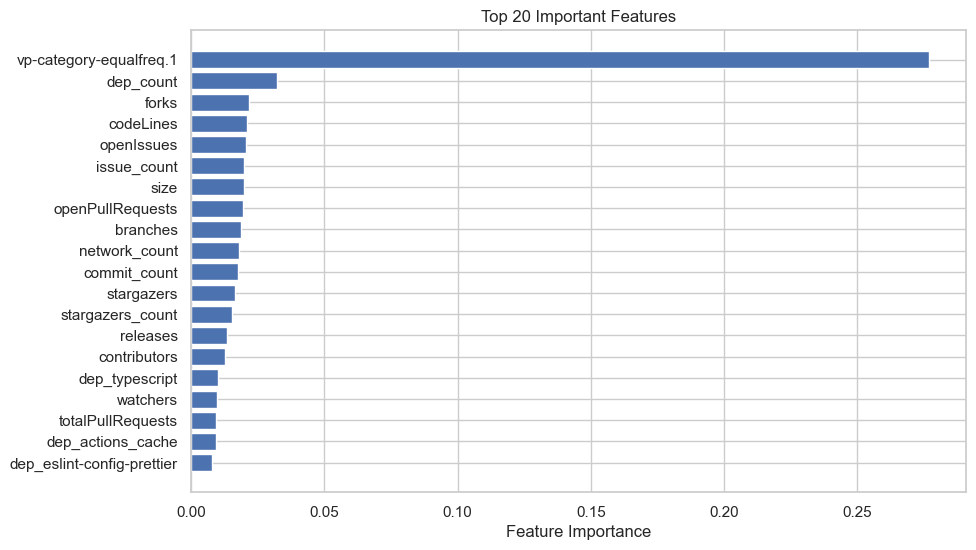

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# Select an importance-based model (Random Forest or XGBoost)
feature_importance_model = best_models["RandomForest"]

# Extract feature importances
feature_importances = feature_importance_model.feature_importances_
feature_names = df_feature_sets["full_features"].drop(columns=["vp-category-equalfreq"]).columns

# Sort by importance
sorted_idx = np.argsort(feature_importances)[::-1]
top_n = 20  # Show only top 20 features

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importances[sorted_idx][:top_n], align="center")
plt.yticks(range(top_n), np.array(feature_names)[sorted_idx][:top_n])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features")
plt.gca().invert_yaxis()
plt.show()


- First bar is the target
- dep_count is the most important feature as IG informed too.